# Exploratory data analysis of Haberman's survival data

### Data description:

The data set contains the cases from a study that was conducted between 1958 to 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 



### Attributes:

### Objective:

In [1]:
# import of all the libraries that are required for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Loading of the Haberman's survival data from the csv file "Haberman.csv"
cancer_df=pd.read_csv("haberman.csv",header= None,\
                      names=["age","surgey_year","positive_axillary_nodes","survival_status"],skiprows=1)
cancer_df

,age,surgey_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


### High level statistics:

In [4]:
print(cancer_df.describe(),"\n")
print("Target variable distribution")
print(cancer_df.loc[:,'survival_status'].value_counts())

              age  surgey_year  positive_axillary_nodes  survival_status
count  306.000000   306.000000               306.000000       306.000000
mean    52.457516    62.852941                 4.026144         1.264706
std     10.803452     3.249405                 7.189654         0.441899
min     30.000000    58.000000                 0.000000         1.000000
25%     44.000000    60.000000                 0.000000         1.000000
50%     52.000000    63.000000                 1.000000         1.000000
75%     60.750000    65.750000                 4.000000         2.000000
max     83.000000    69.000000                52.000000         2.000000 

Target variable distribution
1    225
2     81
Name: survival_status, dtype: int64


#### Observations:

## 1. Univariate analysis

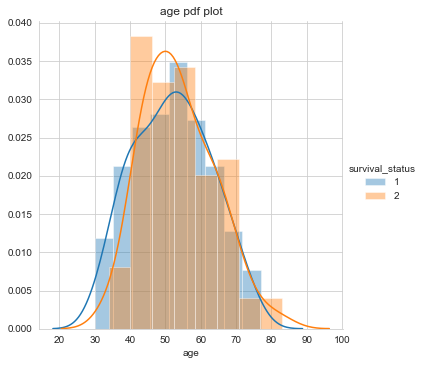

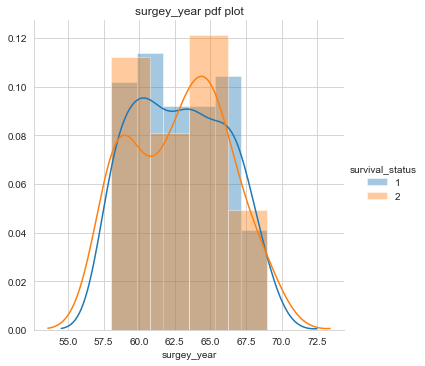

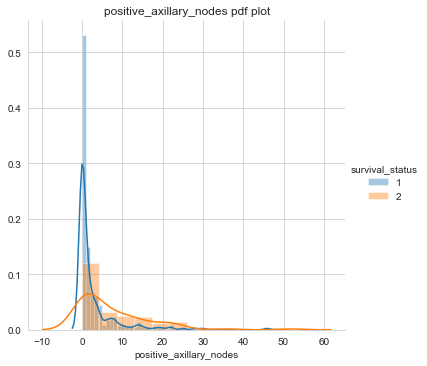

In [16]:
#1.1 Probability density function (pdf)
'''
The datapoints are grouped and represented as bars called histogram. The increase in bar represents the number of data points for that group. 
Probability density function is basicaly a smoothed form of histogram.  
So we will do the pdf analysis for each features like age, surgery_year and positive_axillary_nodes upon class variable survival_status. 
'''
for feature in cancer_df.columns[:-1]:
    sb.set_style("whitegrid")
    sb.FacetGrid(cancer_df,hue="survival_status",height=5)\
    .map(sb.distplot, feature)\
    .add_legend()
    plt.title(feature + " pdf plot")
    plt.show()

PDF for survival_status_1 [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin_edges for survival_status_1 [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
CDF survival_status_1 [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
PDF for survival_status_2 [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bin_edge for survival_status_2 [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
CDF for survival_status_2 [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


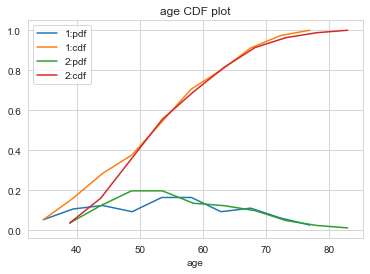

PDF for survival_status_1 [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bin_edges for survival_status_1 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDF survival_status_1 [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
PDF for survival_status_2 [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Bin_edge for survival_status_2 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDF for survival_status_2 [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


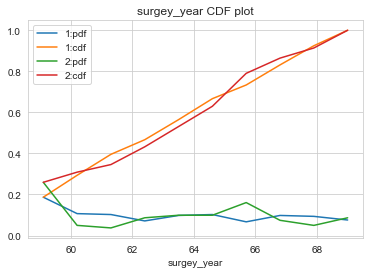

PDF for survival_status_1 [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin_edges for survival_status_1 [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
CDF survival_status_1 [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
PDF for survival_status_2 [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin_edge for survival_status_2 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
CDF for survival_status_2 [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


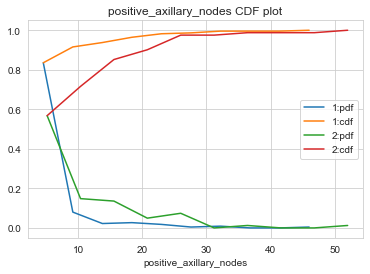

In [17]:
#1.2 cdf
'''
CDF (Cumulative distribution function) is the integartion of pdf or the area under the curve of pdf
'''
survival_status_1=cancer_df.loc[cancer_df['survival_status']==1]
survival_status_2=cancer_df.loc[cancer_df['survival_status']==2]

for feature in cancer_df.columns[:-1]:
    count,bin_edges=np.histogram(survival_status_1[feature],bins=10,density=False)

    pdf=count/sum(count)
    print("PDF for survival_status_1",pdf)
    print("Bin_edges for survival_status_1",bin_edges)

    # generate cdf
    cdf =np.cumsum(pdf)
    print("CDF survival_status_1",cdf)
    plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)
    
    count,bin_edges=np.histogram(survival_status_2[feature],bins=10,density=False)

    pdf=count/sum(count)
    print("PDF for survival_status_2",pdf)
    print("Bin_edge for survival_status_2",bin_edges)

    # generate cdf
    cdf =np.cumsum(pdf)
    print("CDF for survival_status_2",cdf)
    plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)
    plt.xlabel(feature)
    plt.legend(["1:pdf","1:cdf","2:pdf","2:cdf"])
    
    plt.title(feature + " CDF plot")
    plt.show()
    

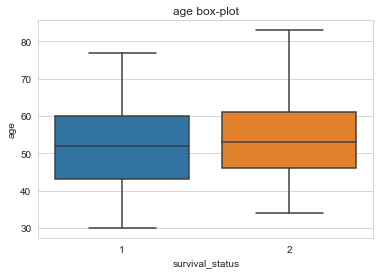

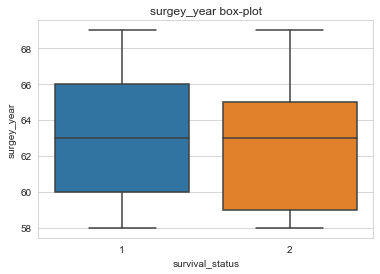

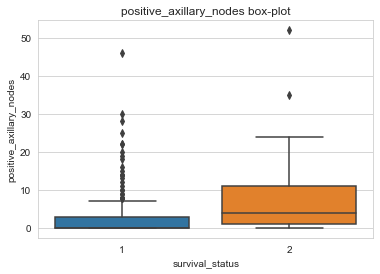

In [18]:
#1.3 Box plot
'''
Box plot represents 5 point summery of data points.
1. Q1-1.5*IQR
2. Q1  (25th percentile)
3. Q2  (50th percentile)
4. Q3  (75th percentile)
5. Q3 + 1.5*IQR
IQR = Q3-Q1 (Inter Quartile Range)
'''
for feature in cancer_df.columns[:-1]:
    sb.boxplot(x='survival_status',y=feature,data=cancer_df)   
    
    plt.title(feature + " box-plot")
    plt.show()

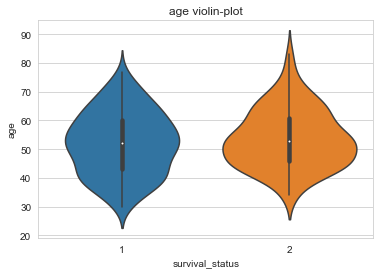

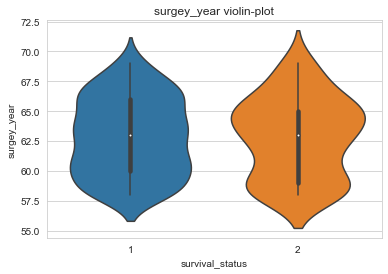

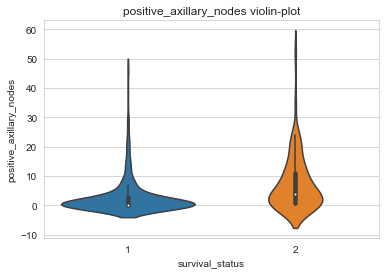

In [19]:
#1.4 Violin plot
'''
Violin plot is the combination of both pdf and box plot
'''
for feature in cancer_df.columns[:-1]:
    sb.violinplot(x="survival_status",y=feature,data=cancer_df)
    
    plt.title(feature + " violin-plot")
    plt.show()


### Observation

## 2. Bivariate analysis

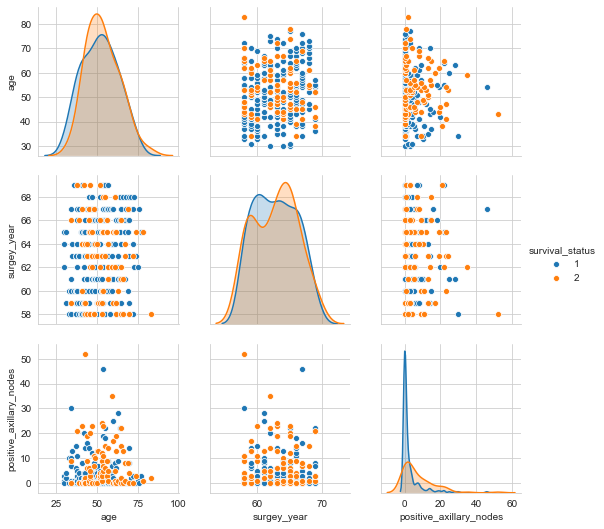

In [20]:
# Pair plot
'''
Pair plot is a type of bivariate plot analysis where the combination of all the feature are plotted by taking one in x axis and other in y axis.
Sometimes one fature is not sufficient for the data clasification, then the combination works.
'''
sb.pairplot(cancer_df,hue='survival_status',vars=['age','surgey_year','positive_axillary_nodes'])

plt.show()

### Observation